In [61]:
import io
import pandas as pd

file_path = 'labeled_data.csv'
df = pd.read_csv(file_path)
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tweet = df.loc[:,"tweet"]
tweet = tweet.tolist()

In [63]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopword=set(stopwords.words('english'))
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
for i in range(len(tweet)):
  tweet[i]=clean_text(tweet[i])

In [5]:
vectorizer = TfidfVectorizer()

In [6]:
class_list = df.loc[:,'class']
class_list = class_list.tolist()

for i in range(len(class_list)):
  if class_list[i] == 0:
    class_list[i] = 3

[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 

In [7]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(tweet, class_list, test_size = 0.1)


In [8]:
features_train = vectorizer.fit_transform(features_train)
features_test = vectorizer.transform(features_test)

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
clf = LogisticRegression(max_iter=1000)
clf.fit(features_train, labels_train)

y_pred = clf.predict(features_test)
print(f"Accuracy: {accuracy_score(labels_test, y_pred)}")
print(f"Classification report:\n{classification_report(labels_test, y_pred)}")

Accuracy: 0.891085114965712
Classification report:
              precision    recall  f1-score   support

           1       0.91      0.96      0.93      1902
           2       0.87      0.81      0.84       429
           3       0.52      0.20      0.28       148

    accuracy                           0.89      2479
   macro avg       0.76      0.66      0.69      2479
weighted avg       0.88      0.89      0.88      2479



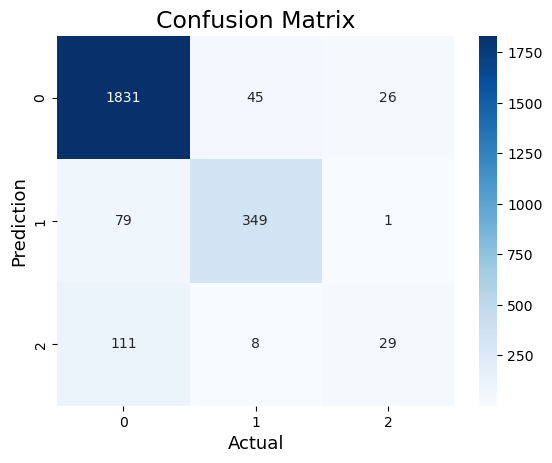

Accuracy   : 0.891085114965712


In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
cm = confusion_matrix(labels_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt = 'g',
            cmap="Blues")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy = accuracy_score(labels_test, y_pred)
print("Accuracy   :", accuracy)

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
clf = RandomForestClassifier()
clf.fit(features_train, labels_train)

y_pred = clf.predict(features_test)
print(f"Accuracy: {accuracy_score(labels_test, y_pred)}")
print(f"Classification report:\n{classification_report(labels_test, y_pred)}")

Accuracy: 0.8777732956837434
Classification report:
              precision    recall  f1-score   support

           1       0.88      0.97      0.93      1902
           2       0.86      0.73      0.79       429
           3       0.52      0.08      0.14       148

    accuracy                           0.88      2479
   macro avg       0.76      0.60      0.62      2479
weighted avg       0.86      0.88      0.86      2479



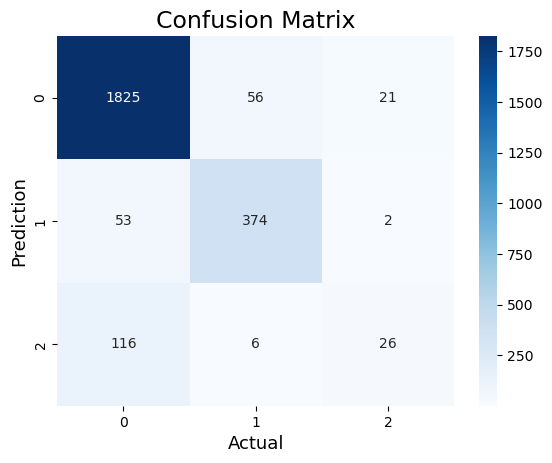

Accuracy   : 0.8975393303751513


In [14]:
# compute the confusion matrix
cm = confusion_matrix(labels_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt = 'g',
            cmap="Blues")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy = accuracy_score(labels_test, y_pred)
print("Accuracy   :", accuracy)

# Supoort Vector Classifier

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV



clf = SVC(kernel = 'linear', C = 1)
clf.fit(features_train, labels_train)

y_pred = clf.predict(features_test)
print(f"Accuracy: {accuracy_score(labels_test, y_pred)}")
print(f"Classification report:\n{classification_report(labels_test, y_pred)}")

Accuracy: 0.8975393303751513
Classification report:
              precision    recall  f1-score   support

           1       0.92      0.96      0.94      1902
           2       0.86      0.87      0.86       429
           3       0.53      0.18      0.26       148

    accuracy                           0.90      2479
   macro avg       0.77      0.67      0.69      2479
weighted avg       0.88      0.90      0.88      2479



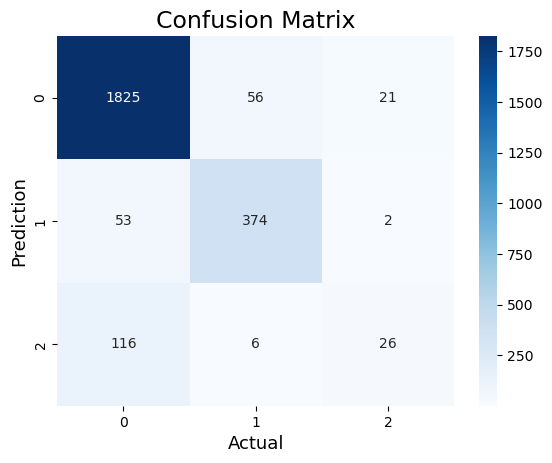

Accuracy   : 0.8975393303751513


In [13]:
# compute the confusion matrix
cm = confusion_matrix(labels_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt = 'g',
            cmap="Blues")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy = accuracy_score(labels_test, y_pred)
print("Accuracy   :", accuracy)

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, GRU,SimpleRNN, Embedding,Dense, Activation, BatchNormalization 
from keras.layers import Dropout,GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [16]:
maxlen = 300 # maximum sequence length
input_dim = 10000 # size of the vocabulary
embedding_dim = 300 # size of the embedding
filters = 64 # number of filters
kernel_size = 5 # kernel size for the Conv1D layer
hidden_dims = 32 # size of the hidden layer
epochs = 20 # number of epochs
batch_size = 32 # batch size

In [20]:
num_classes = len(set(class_list))
class_list_np = np.eye(num_classes)[np.array(class_list)-1]
tweet = df.loc[:,"tweet"]
tweet = tweet.tolist()

for i in range(len(tweet)):
  tweet[i]=clean_text(tweet[i])

tokenizer = Tokenizer(num_words=input_dim)
tokenizer.fit_on_texts(tweet)
sequences = tokenizer.texts_to_sequences(tweet)
tweet = pad_sequences(sequences, maxlen=maxlen)
features_train_cnn, features_test_cnn, labels_train_cnn, labels_test_cnn = train_test_split(tweet, class_list_np, test_size = 0.3)

# CNN

In [52]:
model = Sequential()
model.add(Embedding(input_dim, embedding_dim, input_length=maxlen))

model.add(Conv1D(32, kernel_size= 3, activation='relu'))
model.add(MaxPooling1D())


model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(num_classes, activation='sigmoid'))


In [53]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(0.0001), metrics=['accuracy'])

# Train the model
history = model.fit(features_train_cnn, labels_train_cnn, epochs=epochs, batch_size=128, validation_data=(features_test_cnn, labels_test_cnn), callbacks = [early_stopping_callback])

Epoch 1/20
136/136 [==============================] - 2s 12ms/step - loss: 0.7354 - accuracy: 0.7631 - val_loss: 0.6601 - val_accuracy: 0.7726
Epoch 2/20
136/136 [==============================] - 1s 9ms/step - loss: 0.6524 - accuracy: 0.7751 - val_loss: 0.6374 - val_accuracy: 0.7726
Epoch 3/20
136/136 [==============================] - 1s 9ms/step - loss: 0.5961 - accuracy: 0.7751 - val_loss: 0.5403 - val_accuracy: 0.7726
Epoch 4/20
136/136 [==============================] - 1s 9ms/step - loss: 0.4741 - accuracy: 0.8087 - val_loss: 0.4194 - val_accuracy: 0.8491
Epoch 5/20
136/136 [==============================] - 1s 9ms/step - loss: 0.3836 - accuracy: 0.8894 - val_loss: 0.3682 - val_accuracy: 0.8849
Epoch 6/20
136/136 [==============================] - 1s 9ms/step - loss: 0.3385 - accuracy: 0.9068 - val_loss: 0.3468 - val_accuracy: 0.8915
Epoch 7/20
136/136 [==============================] - 1s 9ms/step - loss: 0.3141 - accuracy: 0.9106 - val_loss: 0.3378 - val_accuracy: 0.8909
Epoch

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


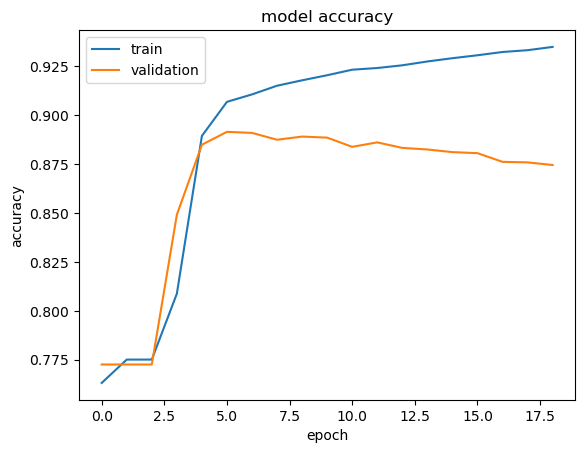

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


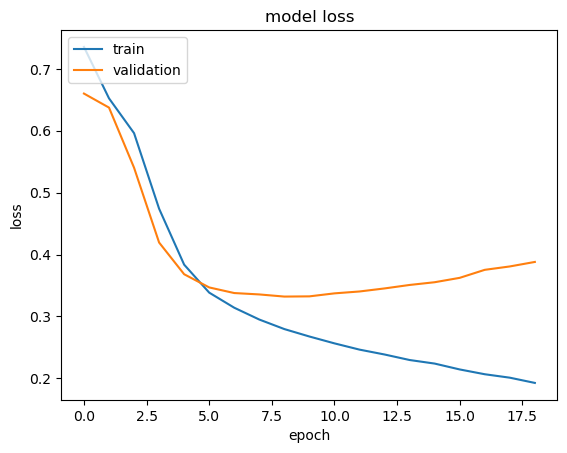

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path.eps', format='eps', dpi=1000)
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path1.eps', format='eps', dpi=1000)
plt.show()

# RNN

In [65]:
token = Tokenizer(num_words=None)
max_len = 1500

token.fit_on_texts(tweet)

features_train, features_test, labels_train, labels_test = train_test_split(tweet, class_list_np, test_size = 0.3)

features_train_seq = token.texts_to_sequences(features_train)
features_test_seq = token.texts_to_sequences(features_test)

#zero pad the sequences
xtrain_pad = pad_sequences(features_train_seq, maxlen=300)
xvalid_pad = pad_sequences(features_test_seq, maxlen=300)

word_index = token.word_index


In [66]:
from tqdm import tqdm

embeddings_index = {}
f = open('glove.840B.300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

2196018it [03:50, 9515.32it/s]

Found 2196017 word vectors.


In [67]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))

for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 25712/25712 [00:00<00:00, 491128.43it/s]


In [70]:

# GRU with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
             300,
             weights=[embedding_matrix],
             input_length=300,
             trainable=False))

model.add(Dropout(0.5))
model.add(GRU(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])   
    
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 300, 300)          7713900   
                                                                 
 dropout_16 (Dropout)        (None, 300, 300)          0         
                                                                 
 gru_1 (GRU)                 (None, 64)                70272     
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 3)                 195       
                                                                 
Total params: 7,788,527
Trainable params: 74,627
Non-trainable params: 7,713,900
_________________________________________________________________


In [71]:
callbacks = [
    ReduceLROnPlateau(monitor ='val_loss',factor = 0.1,patience = 10,min_delta=0.2,verbose=1,min_lr=0.0000000001),

]

history_rnn = model.fit(xtrain_pad, labels_train,validation_data=(xvalid_pad, labels_test), epochs=20, batch_size=128)

Epoch 1/20
136/136 [==============================] - 4s 19ms/step - loss: 0.4324 - accuracy: 0.8423 - val_loss: 0.3061 - val_accuracy: 0.8885
Epoch 2/20
136/136 [==============================] - 2s 15ms/step - loss: 0.2935 - accuracy: 0.8902 - val_loss: 0.2859 - val_accuracy: 0.8935
Epoch 3/20
136/136 [==============================] - 2s 16ms/step - loss: 0.2731 - accuracy: 0.8973 - val_loss: 0.2798 - val_accuracy: 0.8939
Epoch 4/20
136/136 [==============================] - 2s 15ms/step - loss: 0.2599 - accuracy: 0.9006 - val_loss: 0.2800 - val_accuracy: 0.8975
Epoch 5/20
136/136 [==============================] - 2s 15ms/step - loss: 0.2537 - accuracy: 0.9045 - val_loss: 0.2785 - val_accuracy: 0.8980
Epoch 6/20
136/136 [==============================] - 2s 15ms/step - loss: 0.2482 - accuracy: 0.9058 - val_loss: 0.2796 - val_accuracy: 0.8956
Epoch 7/20
136/136 [==============================] - 2s 15ms/step - loss: 0.2404 - accuracy: 0.9093 - val_loss: 0.2819 - val_accuracy: 0.8989

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


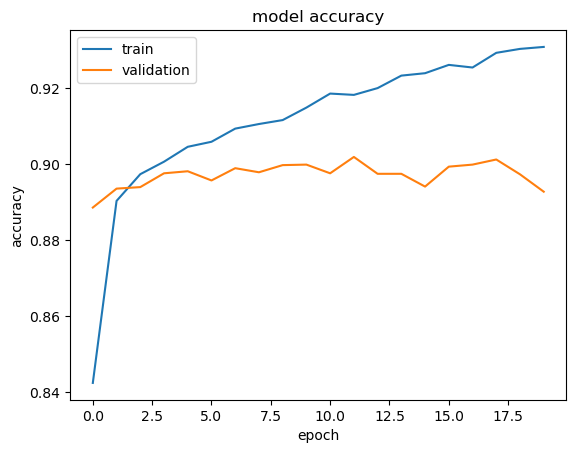

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


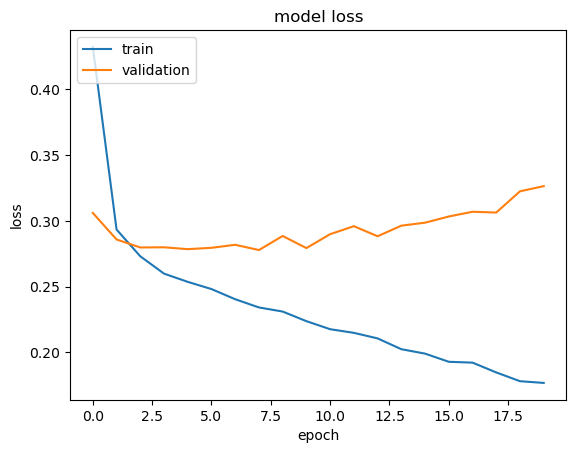

In [72]:
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path.eps', format='eps', dpi=1000)
plt.show()
#summarize history for loss
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path1.eps', format='eps', dpi=1000)
plt.show()